# **Airline Customer Satisfaction Capstone**

## Modeling

Now that we've cleaned, wrangled, and pre-processed the data, it's time to create some models for our client.  We want to determine which model works best for our client's needs.  To that end, we've decided to focus on the precision of the models, as our client is more likely to tolerate false negatives than false positives of our target variable, "Satisfaction."  Specifically, since we are most interested in which passengers are "Satisfied" instead of "Neutral or Dissatisfied," SIA would be most tolerant of our models falsely classifying passengers as "Neutral or Dissatisfied" when they are actually "Satisfied" than the reverse.

## 1. Table of Contents

[1. Table of Contents](#1.-Table-of-Contents)

[2. Import Packages](#2.-Import-Packages)

[3. Load Data](#3.-Load-Data)

[4. Explore the Data](#4.-Explore-the-Data)

[5. Resampling Techniques](#5.-Resampling-Techniques)

[6. Logistic Regression](#6.-Logistic-Regression)

[7. Random Forest](#7.-Random-Forest)

[8. Summary & Next Steps](#8.-Summary-&-Next-Steps)

[9. Hyperparameter Tuning](#9.-Hyperparameter-Tuning)

[10. Feature Importances](#10.-Feature-Importances)

## 2. Import Packages

In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, classification_report,confusion_matrix
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report,plot_confusion_matrix

## 3. Load Data

In [3]:
X_train = pd.read_csv('/Users/lauren/Desktop/X_train.csv', index_col=0)
X_test = pd.read_csv('/Users/lauren/Desktop/X_test.csv', index_col=0)
y_train = pd.read_csv('/Users/lauren/Desktop/y_train.csv', index_col=0)
y_test = pd.read_csv('/Users/lauren/Desktop/y_test.csv', index_col=0)

## 4. Explore the Data

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90640 entries, 107696 to 6923
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   index                                   90640 non-null  int64  
 1   Age                                     90640 non-null  int64  
 2   Flight Distance                         90640 non-null  int64  
 3   Departure Delay                         90640 non-null  int64  
 4   Arrival Delay                           90640 non-null  float64
 5   Departure and Arrival Time Convenience  90640 non-null  int64  
 6   Ease of Online Booking                  90640 non-null  int64  
 7   Check-in Service                        90640 non-null  int64  
 8   Online Boarding                         90640 non-null  int64  
 9   Gate Location                           90640 non-null  int64  
 10  On-board Service                        90640 non-null

In [5]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38847 entries, 18831 to 79733
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   index                                   38847 non-null  int64  
 1   Age                                     38847 non-null  int64  
 2   Flight Distance                         38847 non-null  int64  
 3   Departure Delay                         38847 non-null  int64  
 4   Arrival Delay                           38847 non-null  float64
 5   Departure and Arrival Time Convenience  38847 non-null  int64  
 6   Ease of Online Booking                  38847 non-null  int64  
 7   Check-in Service                        38847 non-null  int64  
 8   Online Boarding                         38847 non-null  int64  
 9   Gate Location                           38847 non-null  int64  
 10  On-board Service                        38847 non-null

In [6]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90640 entries, 107696 to 6923
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Satisfaction  90640 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [7]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38847 entries, 18831 to 79733
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Satisfaction  38847 non-null  object
dtypes: object(1)
memory usage: 607.0+ KB


In [8]:
y_train.value_counts()

Satisfaction           
Neutral or Dissatisfied    51257
Satisfied                  39383
dtype: int64

In [9]:
y_test.value_counts()

Satisfaction           
Neutral or Dissatisfied    21968
Satisfied                  16879
dtype: int64

## 5. Resampling Techniques

There are two resampling techniquest that we will use: undersampling and oversampling.  First, we will look at undersampling:

### 5.1 Undersampling

In [10]:
counts_table = pd.DataFrame()

counts_table['technique'] = ['Original Data']
counts_table['X_train_shape'] = [X_train.shape[0]]
counts_table['y_train_shape'] = [y_train.shape[0]]
counts_table['Satisfied'] = [y_train.value_counts()[1]]
counts_table['Neutral or Dissatisfied'] = [y_train.value_counts()[0]]

counts_table

,technique,X_train_shape,y_train_shape,Satisfied,Neutral or Dissatisfied
0,Original Data,90640,90640,39383,51257


In [11]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

In [12]:
new_row = {'technique':'Random Under Sampling', 
           'X_train_shape': X_train_rus.shape[0],
          'y_train_shape': y_train_rus.shape[0],
           'Satisfied': y_train_rus.value_counts()[1],
          'Neutral or Dissatisfied': y_train_rus.value_counts()[0]}

counts_table = counts_table.append(new_row, ignore_index=True)
counts_table

,technique,X_train_shape,y_train_shape,Satisfied,Neutral or Dissatisfied
0,Original Data,90640,90640,39383,51257
1,Random Under Sampling,78766,78766,39383,39383


### 5.2 SMOTE

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy = 'minority')

X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

In [14]:
new_row = {'technique':'SMOTE - minority', 
           'X_train_shape': X_train_sm.shape[0],
          'y_train_shape': y_train_sm.shape[0],
           'Satisfied': y_train_sm.value_counts()[1],
          'Neutral or Dissatisfied': y_train_sm.value_counts()[0]}

counts_table = counts_table.append(new_row, ignore_index=True)
counts_table

,technique,X_train_shape,y_train_shape,Satisfied,Neutral or Dissatisfied
0,Original Data,90640,90640,39383,51257
1,Random Under Sampling,78766,78766,39383,39383
2,SMOTE - minority,102514,102514,51257,51257


In [15]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy().ravel()
X_train_rus_np = X_train_rus.to_numpy()
y_train_rus_np = y_train_rus.to_numpy().ravel()
X_train_sm_np = X_train_sm.to_numpy()
y_train_sm_np = y_train_sm.to_numpy().ravel()

X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy().ravel()

In [16]:
print(X_train_np.shape, y_train_np.shape)
print(X_train_rus_np.shape, y_train_rus_np.shape)
print(X_train_sm_np.shape, y_train_sm_np.shape)

(90640, 28) (90640,)
(78766, 28) (78766,)
(102514, 28) (102514,)


## 6. Logistic Regression

### 6.1 Random Under Sampling

In [17]:
from sklearn.linear_model import LogisticRegression

lr_rus = LogisticRegression(solver = 'saga', random_state=42, max_iter = 2000)
# Fit the model on the trainng data.
lr_rus.fit(X_train_rus_np, y_train_rus_np)

y_pred_train_1a = lr_rus.predict(X_train_rus_np)
y_pred_test_1a = lr_rus.predict(X_test_np)

/Users/lauren/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [18]:
cm_1a_train = confusion_matrix(y_train_rus_np, y_pred_train_1a)
cm_1a_test = confusion_matrix(y_test_np, y_pred_test_1a)

Text(0.5, 1.0, 'LogisticRegression RUS - Testing confusion matrix')

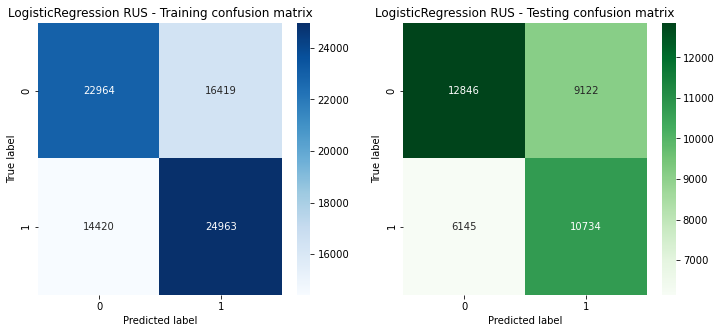

In [19]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_1a_train, annot=True, fmt = '', cmap = 'Blues',ax = ax[0])
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('LogisticRegression RUS - Training confusion matrix')

sns.heatmap(cm_1a_test, annot=True, fmt = '', cmap = 'Greens',ax = ax[1])
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('LogisticRegression RUS - Testing confusion matrix')

In [20]:
from sklearn.metrics import classification_report

target_names = ['Satisfied', 'Neutral or Dissatisfied']

print("[Training Classification Report]")
train_classification_report_1a = classification_report(y_train_rus_np, y_pred_train_1a, target_names=target_names)
print(train_classification_report_1a)

print("[Test Classification Report]")
test_classification_report_1a = classification_report(y_test_np, y_pred_test_1a, target_names=target_names)
print(test_classification_report_1a)

[Training Classification Report]
                         precision    recall  f1-score   support

              Satisfied       0.61      0.58      0.60     39383
Neutral or Dissatisfied       0.60      0.63      0.62     39383

               accuracy                           0.61     78766
              macro avg       0.61      0.61      0.61     78766
           weighted avg       0.61      0.61      0.61     78766

[Test Classification Report]
                         precision    recall  f1-score   support

              Satisfied       0.68      0.58      0.63     21968
Neutral or Dissatisfied       0.54      0.64      0.58     16879

               accuracy                           0.61     38847
              macro avg       0.61      0.61      0.61     38847
           weighted avg       0.62      0.61      0.61     38847



### 6.2 SMOTE

In [21]:
lr_sm = LogisticRegression(solver = 'saga', random_state=42, max_iter = 2000)
# Fit the model on the trainng data.
lr_sm.fit(X_train_sm_np, y_train_sm_np)

y_pred_train_1c = lr_sm.predict(X_train_sm_np)
y_pred_test_1c = lr_sm.predict(X_test_np)

/Users/lauren/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [22]:
cm_1c_train = confusion_matrix(y_train_sm_np,y_pred_train_1c)
cm_1c_test = confusion_matrix(y_test_np,y_pred_test_1c)

Text(0.5, 1.0, 'LogisticRegression SMOTE - Testing confusion matrix')

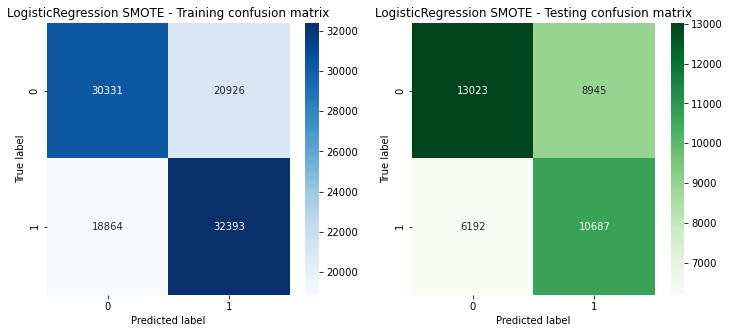

In [23]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_1c_train, annot=True, fmt = '', cmap = 'Blues',ax = ax[0])
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('LogisticRegression SMOTE - Training confusion matrix')

sns.heatmap(cm_1c_test, annot=True, fmt = '', cmap = 'Greens',ax = ax[1])
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('LogisticRegression SMOTE - Testing confusion matrix')

In [24]:
target_names = ['Satisfied', 'Neutral or Dissatisfied']

print("[Training Classification Report]")
train_classification_report_1b = classification_report(y_train_sm_np, y_pred_train_1c, target_names=target_names)
print(train_classification_report_1b)

print("[Test Classification Report]")
test_classification_report_1b = classification_report(y_test_np, y_pred_test_1c, target_names=target_names)
print(test_classification_report_1b)

[Training Classification Report]
                         precision    recall  f1-score   support

              Satisfied       0.62      0.59      0.60     51257
Neutral or Dissatisfied       0.61      0.63      0.62     51257

               accuracy                           0.61    102514
              macro avg       0.61      0.61      0.61    102514
           weighted avg       0.61      0.61      0.61    102514

[Test Classification Report]
                         precision    recall  f1-score   support

              Satisfied       0.68      0.59      0.63     21968
Neutral or Dissatisfied       0.54      0.63      0.59     16879

               accuracy                           0.61     38847
              macro avg       0.61      0.61      0.61     38847
           weighted avg       0.62      0.61      0.61     38847



## 7. Random Forest

### 7.1 Random Under Sampling

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_rus = RandomForestClassifier(random_state=42)
rf_rus.fit(X_train_rus_np, y_train_rus_np)

y_pred_train_2a = rf_rus.predict(X_train_rus_np)
y_pred_test_2a = rf_rus.predict(X_test_np)

In [26]:
cm_2a_train = confusion_matrix(y_train_rus_np,y_pred_train_2a)
cm_2a_test = confusion_matrix(y_test_np,y_pred_test_2a)

Text(0.5, 1.0, 'RandomForest RUS - Testing confusion matrix')

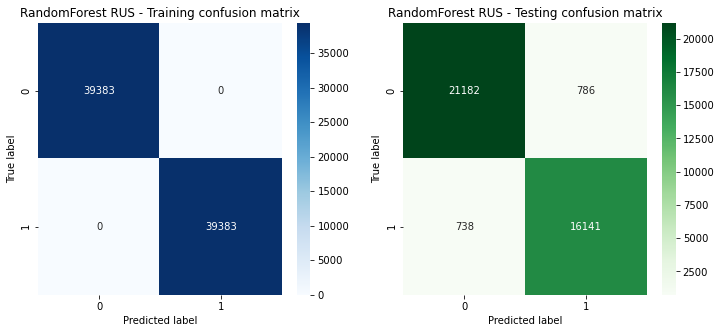

In [27]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_2a_train, annot=True, fmt = '', cmap = 'Blues',ax = ax[0])
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('RandomForest RUS - Training confusion matrix')

sns.heatmap(cm_2a_test, annot=True, fmt = '', cmap = 'Greens',ax = ax[1])
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('RandomForest RUS - Testing confusion matrix')

In [28]:
target_names = ['Satisfied', 'Neutral or Dissatisfied']

print("[Test Classification Report]")
test_classification_report_2a = classification_report(y_test_np, y_pred_test_2a, target_names=target_names)
print(test_classification_report_2a)

[Test Classification Report]
                         precision    recall  f1-score   support

              Satisfied       0.97      0.96      0.97     21968
Neutral or Dissatisfied       0.95      0.96      0.95     16879

               accuracy                           0.96     38847
              macro avg       0.96      0.96      0.96     38847
           weighted avg       0.96      0.96      0.96     38847



### 7.2 SMOTE

In [29]:
rf_sm = RandomForestClassifier(random_state=42)
rf_sm.fit(X_train_sm_np, y_train_sm_np)

y_pred_train_2b = rf_sm.predict(X_train_sm_np)
y_pred_test_2b = rf_sm.predict(X_test_np)

In [30]:
cm_2b_train = confusion_matrix(y_train_sm_np,y_pred_train_2b)
cm_2b_test = confusion_matrix(y_test_np,y_pred_test_2b)

Text(0.5, 1.0, 'RandomForest SMOTE - Testing confusion matrix')

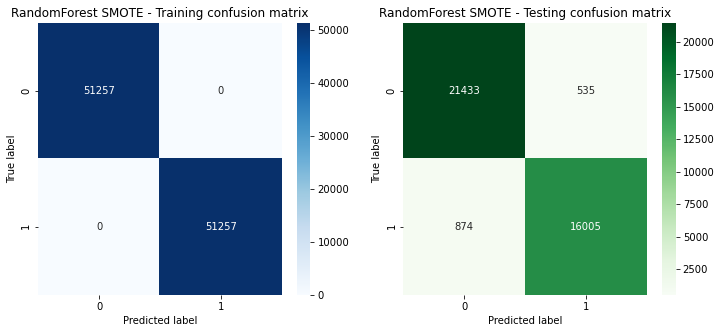

In [31]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_2b_train, annot=True, fmt = '', cmap = 'Blues',ax = ax[0])
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('RandomForest SMOTE - Training confusion matrix')

sns.heatmap(cm_2b_test, annot=True, fmt = '', cmap = 'Greens',ax = ax[1])
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('RandomForest SMOTE - Testing confusion matrix')

In [32]:
target_names = ['Satisfied', 'Neutral or Dissatisfied']

print("[Test Classification Report]")
test_classification_report_2b = classification_report(y_test_np, y_pred_test_2b, target_names=target_names)
print(test_classification_report_2b)

[Test Classification Report]
                         precision    recall  f1-score   support

              Satisfied       0.96      0.98      0.97     21968
Neutral or Dissatisfied       0.97      0.95      0.96     16879

               accuracy                           0.96     38847
              macro avg       0.96      0.96      0.96     38847
           weighted avg       0.96      0.96      0.96     38847



## 8. Summary & Next Steps

Let's create a table to help summarize the four models that we created.  This table summarizes the testing set results for each model.  We are looking at the precision, recall, and f1-score for each model.  As previously discussed, we are most interested in the precision:

In [34]:
! pip install tabulate
from tabulate import tabulate

table = [['Logistic Regression - RUS','0.68','0.58','0.63'],['Logistic Regression - SMOTE','0.68','0.59','0.63'],['Random Forest - RUS','0.97','0.96','0.97'],['Random Forest - SMOTE','0.96','0.98','0.97']]

print(tabulate(table, headers=['Model','Test Precision','Test Recall','Test F1-Score'], tablefmt='presto'))

 Model                       |   Test Precision |   Test Recall |   Test F1-Score
-----------------------------+------------------+---------------+-----------------
 Logistic Regression - RUS   |             0.68 |          0.58 |            0.63
 Logistic Regression - SMOTE |             0.68 |          0.59 |            0.63
 Random Forest - RUS         |             0.97 |          0.96 |            0.97
 Random Forest - SMOTE       |             0.96 |          0.98 |            0.97


All in all, we've trained four models.  Two logistic regression models and two random forest models, using random under sampling and SMOTE.

For the needs of our client, we've decided it would be ideal to optimize precision.  Fortunately, the random forest models performed the best for that metric.  The top two models were:

1 - Random Forest with Random Under Sampling

2 - Random Forest with SMOTE

Next we want to apply hyperparameter tuning to the top models to see if we can decide on which model is the best for our client's needs.

## 9. Hyperparameter Tuning

The below code is adapted from the following:  https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py

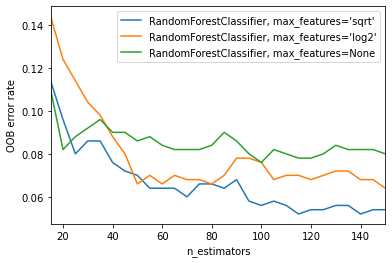

In [35]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 123

# generate a binary classification dataset
X_train, y_train = make_classification(
    n_samples=500,
    n_features=25,
    n_clusters_per_class=1,
    n_informative=15,
    random_state=RANDOM_STATE,
)

# note, setting the 'warm_start' construction parameter to 'True' disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features='sqrt',
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features='log2',
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state = RANDOM_STATE,
        ),
    ),
]

# map a classifier name to a list of (<n_estimators>, <error rate>) pairs
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# range of 'n_estimators' values to explore
min_estimators = 15
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators = i)
        clf.fit(X_train, y_train)
        
        # record the OOB error for each 'n_estimators = i' setting
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# generate the "OOB error rate" vs. "n_estimators" plot
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label = label)
    
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc = "upper right")
plt.show()


The above plot shows how we can use the OOB ("Out of Bag") error rate to find the best values within the search space of n_estimators and max_features, and here we choose the values at which the smaller error curve seems to stabilize.

Per the above, it appears we should use n_estimators = 118 and max_features = sqrt

### 9.1 Random Forest - Random Under Sampling

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_rus = RandomForestClassifier(n_estimators = 118, max_features = 'sqrt')
rf_rus.fit(X_train_rus_np, y_train_rus_np)

y_pred_train_2a = rf_rus.predict(X_train_rus_np)
y_pred_test_2a = rf_rus.predict(X_test_np)

In [37]:
cm_2a_train = confusion_matrix(y_train_rus_np,y_pred_train_2a)
cm_2a_test = confusion_matrix(y_test_np,y_pred_test_2a)

Text(0.5, 1.0, 'RandomForest RUS - Testing confusion matrix')

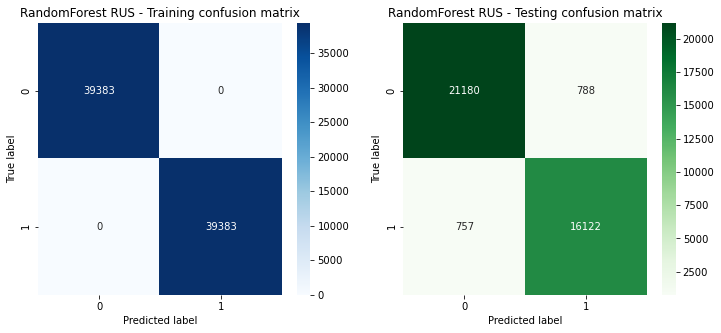

In [38]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_2a_train, annot=True, fmt = '', cmap = 'Blues',ax = ax[0])
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('RandomForest RUS - Training confusion matrix')

sns.heatmap(cm_2a_test, annot=True, fmt = '', cmap = 'Greens',ax = ax[1])
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('RandomForest RUS - Testing confusion matrix')

In [39]:
target_names = ['Satisfied', 'Neutral or Dissatisfied']

print("[Test Classification Report]")
test_classification_report_2a = classification_report(y_test_np, y_pred_test_2a, target_names=target_names)
print(test_classification_report_2a)

[Test Classification Report]
                         precision    recall  f1-score   support

              Satisfied       0.97      0.96      0.96     21968
Neutral or Dissatisfied       0.95      0.96      0.95     16879

               accuracy                           0.96     38847
              macro avg       0.96      0.96      0.96     38847
           weighted avg       0.96      0.96      0.96     38847



### 9.2 Random Forest - SMOTE

In [40]:
rf_sm = RandomForestClassifier(n_estimators = 118, max_features = 'sqrt')
rf_sm.fit(X_train_sm_np, y_train_sm_np)

y_pred_train_2b = rf_sm.predict(X_train_sm_np)
y_pred_test_2b = rf_sm.predict(X_test_np)

In [41]:
cm_2b_train = confusion_matrix(y_train_sm_np,y_pred_train_2b)
cm_2b_test = confusion_matrix(y_test_np,y_pred_test_2b)

Text(0.5, 1.0, 'RandomForest SMOTE - Testing confusion matrix')

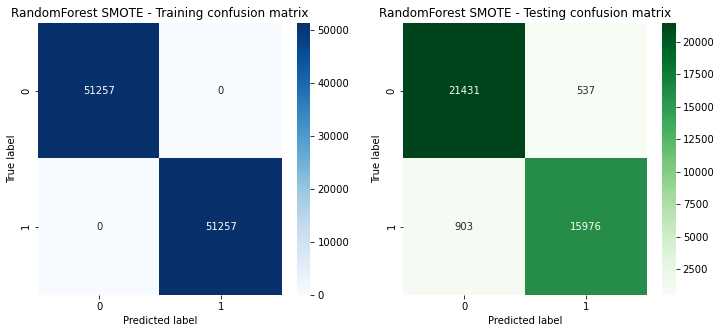

In [42]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_2b_train, annot=True, fmt = '', cmap = 'Blues',ax = ax[0])
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('RandomForest SMOTE - Training confusion matrix')

sns.heatmap(cm_2b_test, annot=True, fmt = '', cmap = 'Greens',ax = ax[1])
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('RandomForest SMOTE - Testing confusion matrix')

In [43]:
target_names = ['Satisfied', 'Neutral or Dissatisfied']

print("[Test Classification Report]")
test_classification_report_2b = classification_report(y_test_np, y_pred_test_2b, target_names=target_names)
print(test_classification_report_2b)

[Test Classification Report]
                         precision    recall  f1-score   support

              Satisfied       0.96      0.98      0.97     21968
Neutral or Dissatisfied       0.97      0.95      0.96     16879

               accuracy                           0.96     38847
              macro avg       0.96      0.96      0.96     38847
           weighted avg       0.96      0.96      0.96     38847



With the hyperparameter tuning, we can see that there was not much of a change in the classification reports for either model.  A summary is below:

In [44]:

table = [['Logistic Regression - RUS','0.68','0.58','0.63'],['Logistic Regression - SMOTE','0.68','0.59','0.63'],['Random Forest - RUS','0.97','0.96','0.97'],['Random Forest - SMOTE','0.96','0.98','0.97']]

print(tabulate(table, headers=['Model','Test Precision','Test Recall','Test F1-Score'], tablefmt='presto'))

 Model                       |   Test Precision |   Test Recall |   Test F1-Score
-----------------------------+------------------+---------------+-----------------
 Logistic Regression - RUS   |             0.68 |          0.58 |            0.63
 Logistic Regression - SMOTE |             0.68 |          0.59 |            0.63
 Random Forest - RUS         |             0.97 |          0.96 |            0.97
 Random Forest - SMOTE       |             0.96 |          0.98 |            0.97


Based on the above summary table, the model with the best precision value was Random Forest - Random Under Sampling.

## 10. Feature Importances

In [45]:
rf_rus.feature_importances_

array([0.03040485, 0.02619558, 0.02496703, 0.00949422, 0.01084686,
       0.01213961, 0.04095185, 0.02467777, 0.15954498, 0.01297999,
       0.02985805, 0.0435156 , 0.0291253 , 0.02391209, 0.00956064,
       0.01914143, 0.13234726, 0.05817882, 0.02322611, 0.00260207,
       0.0026531 , 0.02881808, 0.02170377, 0.06282313, 0.06046299,
       0.052628  , 0.04457879, 0.00266204])

In [46]:


#copy the column names
feature_names = X_test.columns



In [47]:
import time
import numpy as np

start_time = time.time()
importances = rf_rus.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_rus.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


Elapsed time to compute the importances: 0.035 seconds


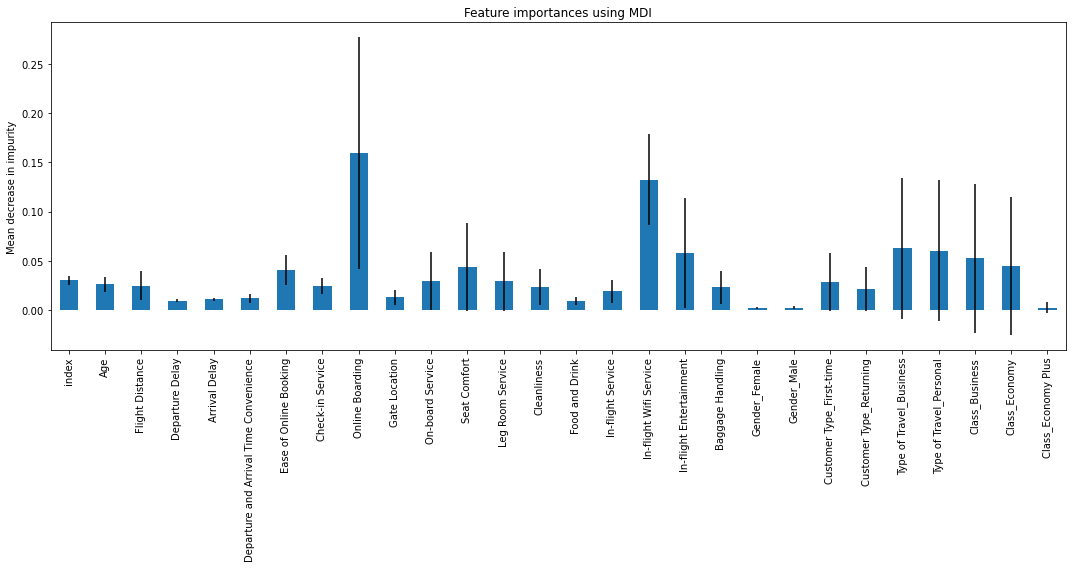

In [48]:
import pandas as pd

rf_rus_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize = (15, 8))
rf_rus_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

From the above, we can see that the ten most important features (in descending order) are the following:

* Online Boarding
* In-flight Wifi Service
* Class_Business
* Type of Travel_Personal
* Type of Travel_Business
* In-flight Entertainment
* Ease of Online Booking
* Seat Comfort
* Class_Economy
* Leg Room Service

From the above, we can also see that the ten least important features include the following (in ascending order):

* Class_Economy Plus
* Gender_Female
* Gender_Male
* Departure Delay
* Food and Drink
* Arrival Delay
* Departure and Arrival Time Convenience
* Gate Location
* In-flight Service
* Baggage Handling